In [110]:
import ipynb.fs.full.helper as hp
from datetime import datetime, timedelta
#helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.fftpack
from scipy import signal
import scipy.interpolate
import h5py
import datetime as dt

In [117]:
start = datetime(1970, 1, 1)

In [100]:
### Last Bag - Has Source Position Information

In [23]:
df = hp.import_bag("~/data/2807/bag7/bag_7.csv")
interpolate_data=df.interpolate()
interpolate_data.to_hdf('~/data/2807/bag7/data7.h5', key='df', mode='w')
df_bag7=pandas.read_hdf('~/data/2807/bag7/data7.h5', 'df')
df_bag7

/home/flybot/anaconda3/envs/FlyDataAnalysis/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/home/flybot/anaconda3/envs/FlyDataAnalysis/lib/python3.6/site-packages/pandas/core/generic.py:2446: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->Index(['_camera_accel_imu_info_frame_id',
       '_camera_gyro_sample_header_frame_id',
       '_camera_odom_sample_child_frame_id',
       '_camera_odom_sample_header_frame_id', '_imu_data_header_frame_id',
       '_imu_data_raw_header_frame_id', '_tf_transforms_0_child_frame_id',
       '_tf_transforms_0_header_frame_id', '_ublox_gps_fix_header_frame_id',
       '_ublox_gps_fix_velocity_header_frame_id'],
      dtype='object')]

  encoding=encoding,


,time,_analog_output_data,_camera_accel_imu_info_bias_variances_0,_camera_accel_imu_info_bias_variances_1,_camera_accel_imu_info_bias_variances_2,_camera_accel_imu_info_data_0,_camera_accel_imu_info_data_1,_camera_accel_imu_info_data_10,_camera_accel_imu_info_data_11,_camera_accel_imu_info_data_2,...,_ublox_gps_fix_velocity_twist_covariance_6,_ublox_gps_fix_velocity_twist_covariance_7,_ublox_gps_fix_velocity_twist_covariance_8,_ublox_gps_fix_velocity_twist_covariance_9,_ublox_gps_fix_velocity_twist_twist_angular_x,_ublox_gps_fix_velocity_twist_twist_angular_y,_ublox_gps_fix_velocity_twist_twist_angular_z,_ublox_gps_fix_velocity_twist_twist_linear_x,_ublox_gps_fix_velocity_twist_twist_linear_y,_ublox_gps_fix_velocity_twist_twist_linear_z
0,1.595960e+09,0.147409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.595960e+09,0.147253,0.0001,0.0001,0.0001,1.013984,0.0,1.017085,-0.072937,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.595960e+09,0.147096,0.0001,0.0001,0.0001,1.013984,0.0,1.017085,-0.072937,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.595960e+09,0.147096,0.0001,0.0001,0.0001,1.013984,0.0,1.017085,-0.072937,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.595960e+09,0.147096,0.0001,0.0001,0.0001,1.013984,0.0,1.017085,-0.072937,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733894,1.595961e+09,0.143074,0.0001,0.0001,0.0001,1.013984,0.0,1.017085,-0.072937,0.0,...,0.0,0.054289,0.0,0.0,0.0,0.0,0.0,-0.009,-0.022,0.03
733895,1.595961e+09,0.142985,0.0001,0.0001,0.0001,1.013984,0.0,1.017085,-0.072937,0.0,...,0.0,0.054289,0.0,0.0,0.0,0.0,0.0,-0.009,-0.022,0.03
733896,1.595961e+09,0.142895,0.0001,0.0001,0.0001,1.013984,0.0,1.017085,-0.072937,0.0,...,0.0,0.054289,0.0,0.0,0.0,0.0,0.0,-0.009,-0.022,0.03
733897,1.595961e+09,0.142806,0.0001,0.0001,0.0001,1.013984,0.0,1.017085,-0.072937,0.0,...,0.0,0.054289,0.0,0.0,0.0,0.0,0.0,-0.009,-0.022,0.03


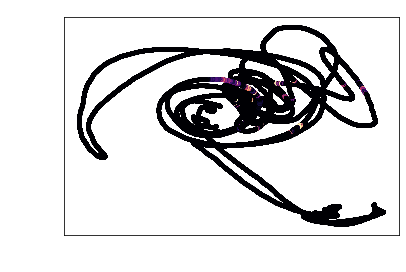

In [24]:
fig_odor_instance = plt.figure()
ax_odor_instance = fig_odor_instance.add_subplot(111)

ax_odor_instance.scatter(df_bag7._ublox_gps_fix_latitude, df_bag7._ublox_gps_fix_longitude, c=df_bag7._analog_output_data, s=10, cmap='magma')
hp.plot_color(ax_odor_instance)

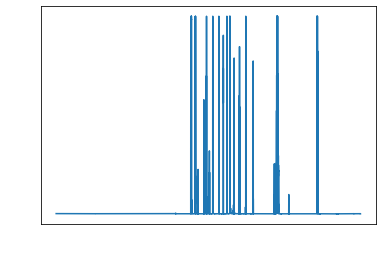

In [17]:
fig_odor_concentration = plt.figure()

ox = fig_odor_concentration.add_subplot(111)
ox.plot(df_bag7.time, df_bag7._analog_output_data)
ox.set_xlabel('Time')
ox.set_ylabel('Odor')

hp.plot_color(ox)

In [162]:
df_gps = pd.read_csv("~/data/2807/bag7/bag7gps.csv")
#df_gps[6:100]
#39.6765001, -119.8206013


In [163]:
df_gps.index.name
df_gps.columns[0]
df_gps.rename(columns={'%time':'time'}, inplace=True)
df_gps["time"]=(df_gps["time"]-1595960115274658316)/100000000000 #starting from 0

df_gps


,time,field.header.seq,field.header.stamp,field.header.frame_id,field.status.status,field.status.service,field.latitude,field.longitude,field.altitude,field.position_covariance0,field.position_covariance1,field.position_covariance2,field.position_covariance3,field.position_covariance4,field.position_covariance5,field.position_covariance6,field.position_covariance7,field.position_covariance8,field.position_covariance_type
0,0.000000,412,1595960105399580684,gps_base,0,7,39.676586,-119.820757,1481.561,16.265089,0.0,0.0,0.0,16.265089,0.0,0.0,0.0,22.800625,2
1,0.002004,413,1595960105599580634,gps_base,0,7,39.676586,-119.820757,1481.555,16.248961,0.0,0.0,0.0,16.248961,0.0,0.0,0.0,22.762441,2
2,0.004001,414,1595960105799580584,gps_base,0,7,39.676586,-119.820756,1481.602,16.232841,0.0,0.0,0.0,16.232841,0.0,0.0,0.0,22.724289,2
3,0.006036,415,1595960105999580535,gps_base,0,7,39.676586,-119.820756,1481.624,16.216729,0.0,0.0,0.0,16.216729,0.0,0.0,0.0,22.676644,2
4,0.008003,416,1595960106199580483,gps_base,0,7,39.676586,-119.820756,1481.663,16.136289,0.0,0.0,0.0,16.136289,0.0,0.0,0.0,22.591009,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2156,4.570133,2568,1595960562400450325,gps_base,0,7,39.676576,-119.820774,1480.332,1.276900,0.0,0.0,0.0,1.276900,0.0,0.0,0.0,2.876416,2
2157,4.572147,2569,1595960562600450268,gps_base,0,7,39.676576,-119.820775,1480.327,1.263376,0.0,0.0,0.0,1.263376,0.0,0.0,0.0,2.859481,2
2158,4.574152,2570,1595960562800450210,gps_base,0,7,39.676576,-119.820775,1480.305,1.254400,0.0,0.0,0.0,1.254400,0.0,0.0,0.0,2.842596,2
2159,4.576195,2571,1595960563000450153,gps_base,0,7,39.676576,-119.820775,1480.284,1.249924,0.0,0.0,0.0,1.249924,0.0,0.0,0.0,2.832489,2


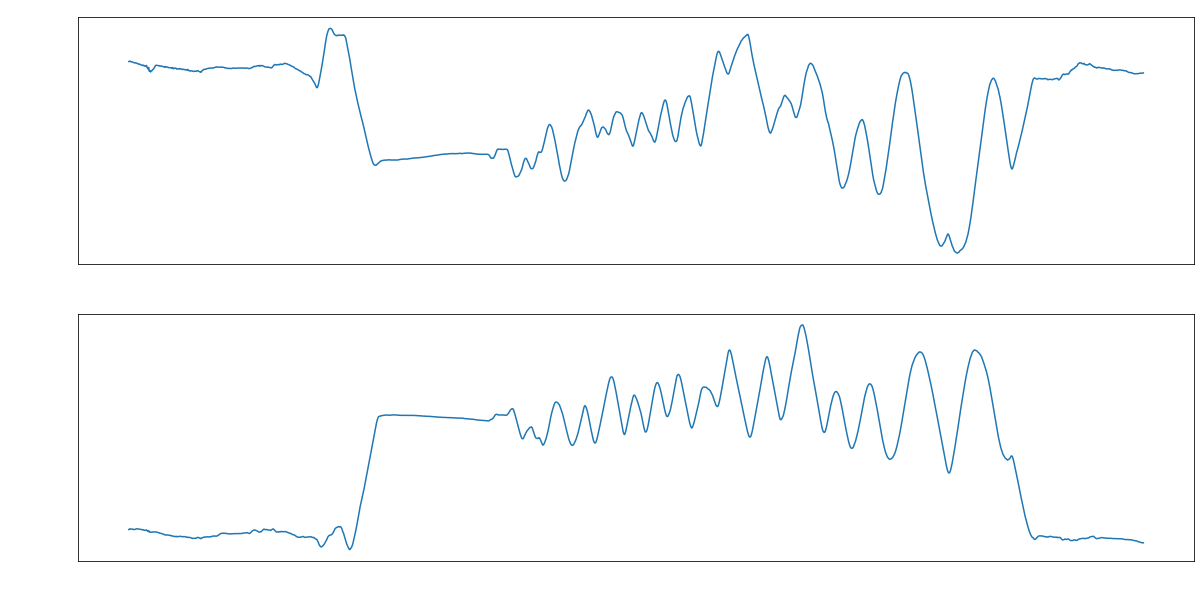

In [164]:
fig_find_position = plt.figure(figsize=(20,10))

ax = fig_find_position.add_subplot(211)
ax.plot(df_gps["time"],df_gps["field.latitude"])
ax.set_xlabel('Time, sec')
ax.set_ylabel('Latitude')

ax1 = fig_find_position.add_subplot(212)
ax1.plot(df_gps["time"],df_gps["field.longitude"])
ax1.set_xlabel('Time')
ax1.set_ylabel('Longitude')

hp.plot_color(ax)
hp.plot_color(ax1)

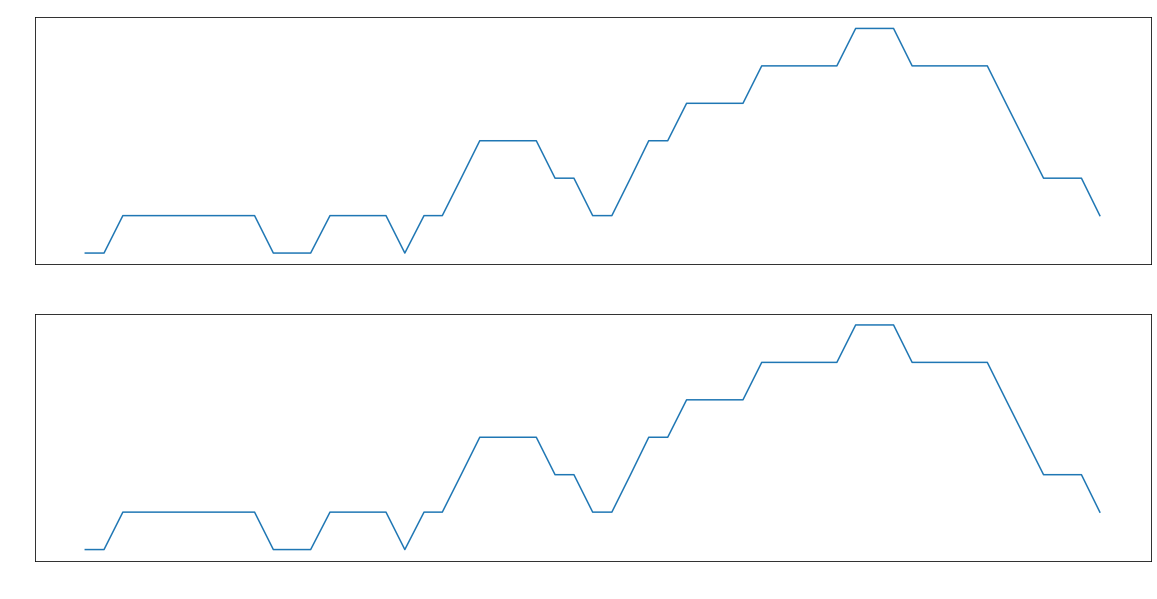

In [181]:
#query = 'time > 1.2 and time < 1.6'
query = 'time > 1.45 and time < 1.56'
df_tmp = df_gps.query(query)

fig_find_position = plt.figure(figsize=(20,10))

ax = fig_find_position.add_subplot(211)
ax.plot(df_tmp["time"],df_tmp["field.latitude"])
ax.set_xlabel('Time, sec')
ax.set_ylabel('Latitude')

ax1 = fig_find_position.add_subplot(212)
ax1.plot(df_tmp["time"],df_tmp["field.latitude"])
ax1.set_xlabel('Time, ')
ax1.set_ylabel('longitude')

hp.plot_color(ax)
hp.plot_color(ax1)

In [182]:
## as per 39.6765001, -119.8206013
source_location_lat=df_tmp["field.latitude"].mean()
source_location_long=df_tmp["field.longitude"].mean()
source_location=[source_location_lat, source_location_long]
source_location


[39.67650835454546, -119.82060767454543]

In [183]:
## Quick check for offset between GPS module and Phone GPS through Google Maps
from geopy import distance
coords_1 = source_location
coords_2 = (39.6765001,-119.8206013)

print (distance.geodesic(coords_1, coords_2).meters)
#81.6 cm to 1 meter offset

1.067267394706542
